In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
sys.path.append('..')
from utility import plot_settings

pd.set_option('display.max_rows',50)
pd.set_option('display.max_columns',50)
pd.options.display.float_format='{:,.2f}'.format

In [13]:
chile = pd.read_pickle('../../data/interim/chile.pkl')
chile.head()

,customer,platform,channel,market,date,sold_quantity,division,segment,category,product,variant,total_gross_sales
55,Electricalsbea Stores,Brick & Mortar,Retailer,Chile,2019-09-01,1,P & A,Peripherals,Internal HDD,AQ Dracula HDD – 3.5 Inch SATA 6 Gb/s 5400 RPM...,Standard,16.23
60,Amazon,E-Commerce,Retailer,Chile,2019-10-01,2,P & A,Peripherals,Internal HDD,AQ Dracula HDD – 3.5 Inch SATA 6 Gb/s 5400 RPM...,Standard,32.46
64,Electricalsbea Stores,Brick & Mortar,Retailer,Chile,2019-11-01,4,P & A,Peripherals,Internal HDD,AQ Dracula HDD – 3.5 Inch SATA 6 Gb/s 5400 RPM...,Standard,64.93
65,Amazon,E-Commerce,Retailer,Chile,2019-11-01,4,P & A,Peripherals,Internal HDD,AQ Dracula HDD – 3.5 Inch SATA 6 Gb/s 5400 RPM...,Standard,64.93
71,Electricalsbea Stores,Brick & Mortar,Retailer,Chile,2019-12-01,3,P & A,Peripherals,Internal HDD,AQ Dracula HDD – 3.5 Inch SATA 6 Gb/s 5400 RPM...,Standard,48.70


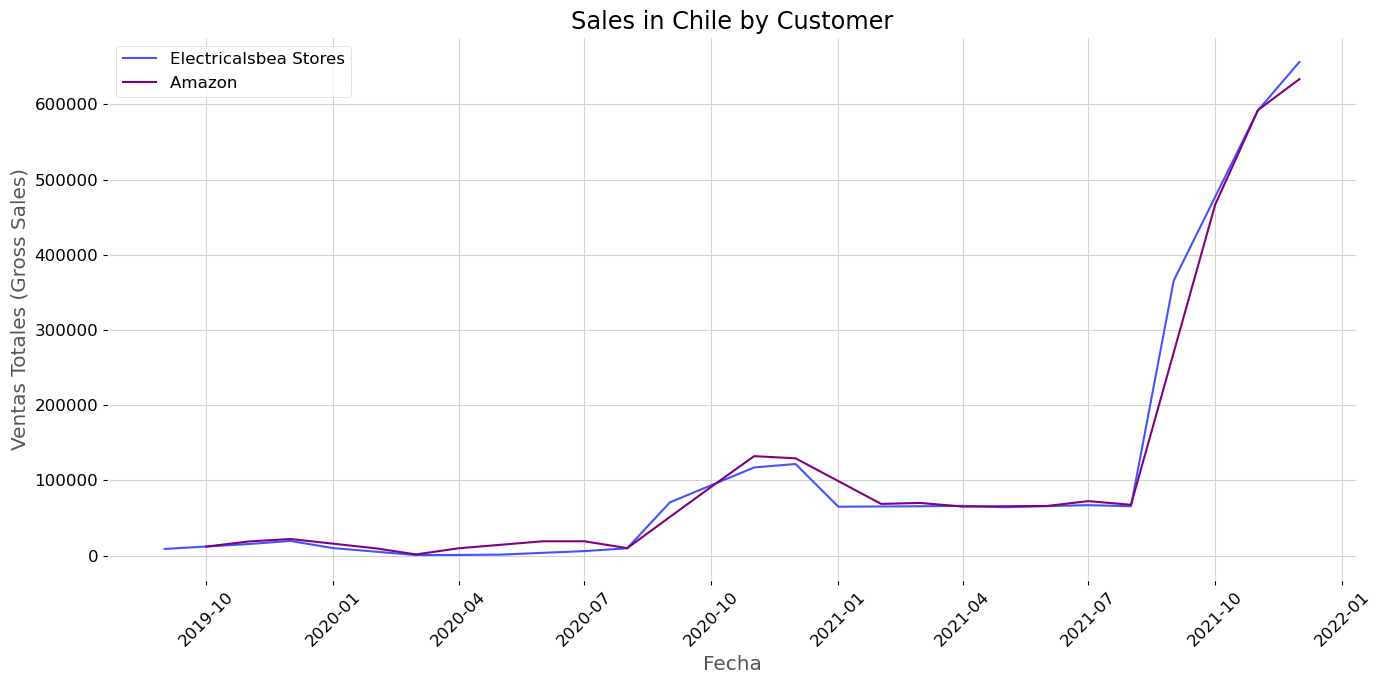

In [16]:

sales_by_customer = chile.groupby(['customer', 'date'])['total_gross_sales'].sum().reset_index()
sales_by_customer = sales_by_customer.sort_values(by='date')

# Crear el gráfico de líneas nuevamente con los datos ordenados
plt.figure(figsize=(14, 7))

for customer in sales_by_customer['customer'].unique():
    subset = sales_by_customer[sales_by_customer['customer'] == customer]
    plt.plot(subset['date'], subset['total_gross_sales'], label=customer)

plt.title('Sales in Chile by Customer')
plt.xlabel('Fecha')
plt.ylabel('Ventas Totales (Gross Sales)')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

As we concluded in the last Notebook, we can visualize an exponential growth after August 2021!
It was not the platform, the customer, the category, neither the products. The why is this happening? Let's check the data.

In [18]:
chile.head()

,customer,platform,channel,market,date,sold_quantity,division,segment,category,product,variant,total_gross_sales
55,Electricalsbea Stores,Brick & Mortar,Retailer,Chile,2019-09-01,1,P & A,Peripherals,Internal HDD,AQ Dracula HDD – 3.5 Inch SATA 6 Gb/s 5400 RPM...,Standard,16.23
60,Amazon,E-Commerce,Retailer,Chile,2019-10-01,2,P & A,Peripherals,Internal HDD,AQ Dracula HDD – 3.5 Inch SATA 6 Gb/s 5400 RPM...,Standard,32.46
64,Electricalsbea Stores,Brick & Mortar,Retailer,Chile,2019-11-01,4,P & A,Peripherals,Internal HDD,AQ Dracula HDD – 3.5 Inch SATA 6 Gb/s 5400 RPM...,Standard,64.93
65,Amazon,E-Commerce,Retailer,Chile,2019-11-01,4,P & A,Peripherals,Internal HDD,AQ Dracula HDD – 3.5 Inch SATA 6 Gb/s 5400 RPM...,Standard,64.93
71,Electricalsbea Stores,Brick & Mortar,Retailer,Chile,2019-12-01,3,P & A,Peripherals,Internal HDD,AQ Dracula HDD – 3.5 Inch SATA 6 Gb/s 5400 RPM...,Standard,48.70
